In [ ]:
#Code borrowed from https://medium.com/@oribarel/getting-the-most-out-of-your-google-colab-2b0585f82403 
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
#!pip install psutil
#!pip install humanize

import psutil
import humanize
import os

In [0]:
# Keras
import keras
from keras import metrics

# File and Folder Management
import os, shutil

# Store history
import json
from google.colab import drive
drive.mount('''/content/drive''', force_remount=True)

train_action = True

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Set directory
aaron_dir = "/content/drive/My Drive/SML_Project"

directory = aaron_dir

In [0]:
print('Old directory:')
!pwd
!ls
os.chdir(directory)
print('New directory:')
!pwd
!ls

Old directory:
/content
drive  sample_data
New directory:
/content/drive/My Drive/SML_Project
best_model.hdf5
binary_data_4
binary_data_all
CNN_Diabetic_Retinopathy_Binary.ipynb
CNN_Diabetic_Retinopathy_Classification.ipynb
CNN_Diabetic_Retinopathy_Classification_old.ipynb
cross_entrophy_dim_500_class_566.h5
cross_entrophy_dim_500_class_count_566_new.h5
data_566
data_566_copy.zip
data_566.zip
data_zip
downsized_data.zip
history
inception_binary_dim_256_class_crop.h5
inception_binary_dim_500_class_4.h5
inception_binary_dim_500_class_566.h5
inception_binary_dim_500_class_all.h5
inception_binary_dim_500_class_all_rand.h5
inception_cross_entrophy_dim_500_class_566.h5
kNN_image_classification.ipynb
__MACOSX
mlp_bin4_500.hdf5
mlp_bin_500.hdf5
pca.pkl
train1.zip
trainLabels.csv


In [0]:
import pandas as pd
import os
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Flatten, Dropout
from pathlib import Path
import pandas as pd

train_target = pd.read_csv(directory + '/trainLabels.csv', delimiter=',')
print(len(train_target))
train_target.head()

35126


,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


# MULTI-LAYER PERCEPTRON WITH BINARY 500*500 Data

In [0]:

train_dir= os.path.join(directory, 'binary_data_4', 'train')
val_dir =os.path.join(directory, 'binary_data_4', 'val')
test_dir =os.path.join(directory, 'binary_data_4', 'test')

data_generation = ImageDataGenerator(rescale=1./255)
train_generator = data_generation.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(500,500),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

print(train_generator.class_indices)

validation_generator = data_generation.flow_from_directory(
        val_dir,
        target_size=(500, 500),
        batch_size=10,
        class_mode='binary',
        shuffle = False)
test_generator = data_generation.flow_from_directory(
        test_dir,
        target_size=(500, 500),
        batch_size=10,
        class_mode='binary',
        shuffle = False)

Found 1132 images belonging to 2 classes.
{'resized_0': 0, 'resized_1': 1}
Found 142 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


In [0]:
train_generator

In [0]:
model = Sequential()
model.add(Dense(256, input_shape = (500,500,3) , activation = 'relu'))
model.add(Dense(110, activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation = 'relu'))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 500, 500, 256)     1024      
_________________________________________________________________
dense_18 (Dense)             (None, 500, 500, 110)     28270     
_________________________________________________________________
dense_19 (Dense)             (None, 500, 500, 64)      7104      
_________________________________________________________________
dropout_11 (Dropout)         (None, 500, 500, 64)      0         
_________________________________________________________________
dense_20 (Dense)             (None, 500, 500, 32)      2080      
_________________________________________________________________
dropout_12 (Dropout)         (None, 500, 500, 32)      0         
_________________________________________________________________
dense_21 (Dense)             (None, 500, 500, 32)     

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=0.0001) 
mc = ModelCheckpoint('mlp_bin4_500.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [mc, es]

In [0]:
import math
mlp_binary_history = model.fit_generator(
        train_generator,
        steps_per_epoch =math.ceil(1132/10),
        epochs=100,
        validation_data=validation_generator,
        validation_steps=math.ceil(142/10),
        callbacks=callbacks_list
        )

Epoch 1/100
114/114 [==============================] - 270s 2s/step - loss: 8.0086 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to mlp_bin4_500.hdf5
Epoch 2/100
114/114 [==============================] - 61s 532ms/step - loss: 8.0030 - acc: 0.5035 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/100
114/114 [==============================] - 60s 530ms/step - loss: 8.0030 - acc: 0.5035 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/100
114/114 [==============================] - 60s 530ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.50000
Epoch 5/100
114/114 [==============================] - 60s 530ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00005: val_acc did not improve from 0.50000
Epoch 6/100
114/114 [==========

In [0]:
history_mlp_bin_4 = 
history_dict = mlp_binary_history.history
history_dir = directory + '/history'
  # Save it under the form of a json file
json.dump(history_dict, open(history_dir + '/'+ 'history_mlp_bin_4', 'w'))

SyntaxError: ignored

In [0]:
from keras.models import load_model
model1 = load_model(directory+ '/mlp_bin4_500.hdf5')
model1

In [0]:
with open(directory + '/history/' + 'history_mlp_bin_4') as json_file:
    history = json.load(json_file)
history.get('val_acc')

[0.4999999983209959,
 0.4999999983209959,
 0.54225352910203,
 0.4999999983209959,
 0.5915492938857683,
 0.5845070503337283,
 0.5211267628720109,
 0.4999999983209959]

Let's plot the loss and accuracy of the model over the training and validation data during training:

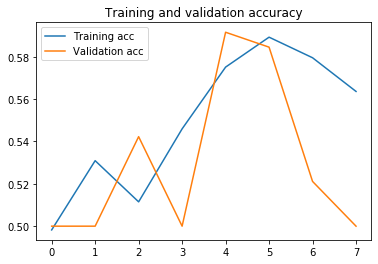

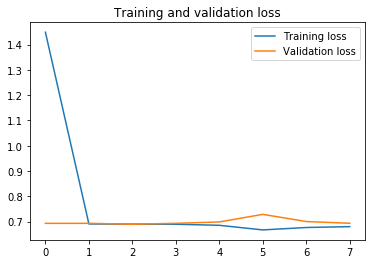

In [0]:
import matplotlib.pyplot as plt

acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model Evaluation

In [0]:
validation_generator.reset()# Required so validation image predictions are matched with actual values
Y_pred = model1.predict_generator(validation_generator)

def calculate_binary_accuracy(prediction, actual):

  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0

  for pred, act in zip(prediction, actual):
    if pred >= .5 and act == 1:
      true_positive += 1
    elif pred < .5 and act == 1:
      false_negative += 1
    elif pred < .5 and act == 0:
      true_negative += 1
    elif pred >= .5 and act == 0:
      false_positive += 1
    else:
      print('Some error', pred, act)

  total = true_positive + true_negative + false_positive + false_negative
  print('Total processes images are', total)
  print(true_positive, true_negative, false_positive, false_negative)
  print('Accuracy is ', (true_positive + true_negative) / total)
  print('Accuracy for class 1 images', true_positive / (true_positive + false_negative))
  print('Accuracy for class 0 images', true_negative / (false_positive + true_negative))
  print('Predicts class 1 a percentage of', (true_positive + false_positive) / total)
  print('Predicts class 0 a percentage of', (true_negative + false_negative) / total)

calculate_binary_accuracy(prediction=Y_pred, actual=validation_generator.classes)

Total processes images are 142
62 22 49 9
Accuracy is  0.5915492957746479
Accuracy for class 1 images 0.8732394366197183
Accuracy for class 0 images 0.30985915492957744
Predicts class 1 a percentage of 0.7816901408450704
Predicts class 0 a percentage of 0.21830985915492956


# Testing Evaluation

In [0]:
test_dir = os.path.join(directory, 'binary_data_4', 'test')

testing_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(500, 500),
        batch_size=20,
        class_mode='binary',
        shuffle = False
        )

Found 142 images belonging to 2 classes.


In [0]:
testing_generator.reset()# Required so test image predictions are matched with actual values
Y_pred = model1.predict_generator(testing_generator)

actual_results=testing_generator.classes

In [0]:
calculate_binary_accuracy(prediction=Y_pred, actual=actual_results)

Total processes images are 142
63 14 57 8
Accuracy is  0.5422535211267606
Accuracy for class 1 images 0.8873239436619719
Accuracy for class 0 images 0.19718309859154928
Predicts class 1 a percentage of 0.8450704225352113
Predicts class 0 a percentage of 0.15492957746478872


# ROC Curve

In [0]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No handles with labels found to put in legend.


No Skill: ROC AUC=0.500
MLP: ROC AUC=0.676


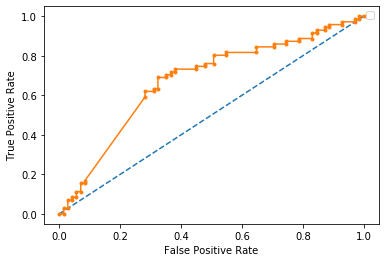

In [0]:
# ROC AUC
model_auc = roc_auc_score(testing_generator.classes, Y_pred)
print('Inception V3: ROC AUC', model_auc)

# Print ROC Curves
dividing_line_probs = [0 for x in range(len(testing_generator.classes))]
dividing_line_false_positive_rate, dividing_line_true_positive_rate, none = roc_curve(testing_generator.classes, dividing_line_probs)
model_false_positive_rate, model_true_positive_rate, none = roc_curve(testing_generator.classes, Y_pred)
pyplot.plot(dividing_line_false_positive_rate, dividing_line_true_positive_rate, linestyle='--')
pyplot.plot(model_false_positive_rate, model_true_positive_rate, marker='.')

pyplot.title(roc_title)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()